<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural networks and computer vision with TensorFlow.

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the Camera of a self-driving car recognizing the car in front.

# Get the data

The images we're working with are from Food101 Dataset. This is the link: https://www.kaggle.com/datasets/dansbecker/food-101


But we have modified it to only have only two classes(Pizza and Steak). This is where the modification notebook is found: https://www.kaggle.com/datasets/dansbecker/food-101



In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-12-04 05:30:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.7s    

2024-12-04 05:30:06 (18.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the begining of any ML project is becoing one with the data.

And for a computer vision project this mean visualzing many samples of our data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
import os

# Walk through pizza_steak directory and list number of files.

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} in directory, and {len(filenames)} in pizza {dirpath}")

There are 2 in directory, and 0 in pizza pizza_steak
There are 2 in directory, and 0 in pizza pizza_steak/train
There are 0 in directory, and 750 in pizza pizza_steak/train/steak
There are 0 in directory, and 750 in pizza pizza_steak/train/pizza
There are 2 in directory, and 0 in pizza pizza_steak/test
There are 0 in directory, and 250 in pizza pizza_steak/test/steak
There are 0 in directory, and 250 in pizza pizza_steak/test/pizza


In [5]:
# Another way to find out how many images are in a file.

num_steak_image_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_image_train

750

### To visualize our image first lets get the class names programmatically

In [6]:
# Get the classnames programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class.strip()
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 382, 3)


array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [42, 33, 36],
        [49, 40, 41],
        [53, 44, 45]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [33, 24, 27],
        [37, 28, 29],
        [39, 30, 31]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [25, 19, 21],
        [26, 20, 22],
        [27, 21, 23]],

       ...,

       [[20, 11,  4],
        [19, 10,  3],
        [18,  9,  2],
        ...,
        [ 9,  6,  1],
        [ 8,  5,  0],
        [ 7,  4,  0]],

       [[17, 10,  4],
        [17, 10,  4],
        [16,  9,  3],
        ...,
        [10,  7,  2],
        [10,  7,  2],
        [10,  7,  2]],

       [[16,  9,  3],
        [15,  8,  2],
        [15,  8,  2],
        ...,
        [14, 11,  6],
        [18, 15, 10],
        [22, 19, 14]]], dtype=uint8)
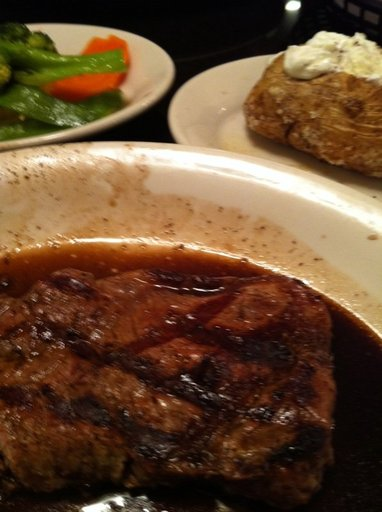

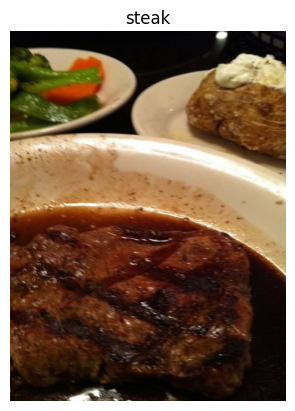

In [8]:
# Call the function

img = view_random_image(target_dir='pizza_steak/train/', target_class='steak');
img

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [42, 33, 36],
        [49, 40, 41],
        [53, 44, 45]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [33, 24, 27],
        [37, 28, 29],
        [39, 30, 31]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [25, 19, 21],
        [26, 20, 22],
        [27, 21, 23]],

       ...,

       [[20, 11,  4],
        [19, 10,  3],
        [18,  9,  2],
        ...,
        [ 9,  6,  1],
        [ 8,  5,  0],
        [ 7,  4,  0]],

       [[17, 10,  4],
        [17, 10,  4],
        [16,  9,  3],
        ...,
        [10,  7,  2],
        [10,  7,  2],
        [10,  7,  2]],

       [[16,  9,  3],
        [15,  8,  2],
        [15,  8,  2],
        ...,
        [14, 11,  6],
        [18, 15, 10],
        [22, 19, 14]]], dtype=uint8)>

# Normalize our data into a specific range i.e 0 and 1.
 We are normalizing our data because neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also known as Normalize) thier pixel values by dividing the image arrays by 255(Since 255 is the max pixel value)

In [10]:
# Scaling/Normalizing our data.

img/255

array([[[0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.16470588, 0.12941176, 0.14117647],
        [0.19215686, 0.15686275, 0.16078431],
        [0.20784314, 0.17254902, 0.17647059]],

       [[0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.12941176, 0.09411765, 0.10588235],
        [0.14509804, 0.10980392, 0.11372549],
        [0.15294118, 0.11764706, 0.12156863]],

       [[0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.09803922, 0.0745098 , 0.08235294],
        [0.10196078, 0.07843137, 0.08627451],
        [0.10588235, 0.08235294, 0.09019608]],

       ...,

       [[0.07843137, 0.04313725, 0.01568627],
        [0.0745098 , 0.03921569, 0.01176471],
        [0.07058824, 0

# An end-to-end example.

Let's build a CNN to find patterns in our images:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
# from tensorflow.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed.
tf.random.set_seed(42)

# Proprocess data (get all the data in 0 and 1 i.e scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# Setup paths to our data directories.
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen = valid_datagen.flow_from_directory(test_dir,
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               target_size=(224,244),
                                                               seed=42)


# Build a CNN model(same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the CNN model.
model_1.compile(
     loss="binary_crossentropy",
     optimizer = tf.keras.optimizers.Adam(),
     metrics = ['accuracy']
 )

 # Fit the model.
model_1.fit(
     train_data, epochs=5,
     steps_per_epoch = len(train_data),
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.6791 - loss: 0.5878
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.7937 - loss: 0.4484 
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.8211 - loss: 0.3798


We are using a GPU to improve the runtime of our neural network.

In [12]:
len(train_data)

47

In [13]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Use the same model as before

Let's relicate th emodel we've built in a previous section to see if it works with our image data.


In [14]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # Make sure this size matches the input shape of the model
                                               class_mode='binary',
                                               seed=42)

# Create a separate ImageDataGenerator for validation if needed
# Or, if using the same preprocessing for validation, you can reuse train_datagen
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(test_dir, # Use the valid_datagen instance here
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               target_size=(224,224), # Changed to (224, 224) to match train_data and model input
                                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlwo Playground model.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model.
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model.
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps=len(valid_data))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.5089 - loss: 1.8355 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.4902 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5114 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


In [16]:
# Get a summary of model_2

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1).

model_2 perform terrible....

In [17]:
# Set up random seed.
tf.random.set_seed(42)

# Create model same as above but lets modify.
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_3.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model.
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.5927 - loss: 5.4243 - val_accuracy: 0.6120 - val_loss: 1.6131
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6705 - loss: 1.0811 - val_accuracy: 0.7760 - val_loss: 0.4814
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.7721 - loss: 0.6055 - val_accuracy: 0.5960 - val_loss: 0.9928


In [18]:
# Get a summary of model_3.

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Let's break it down.

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here is scaling/normalizing)
3. Creat a model (start with a baseline)
4. Fit the model
5. Evaluate the model.
6. Adjust d/f parameters and improve the model.
7. Repeat until satisfied (experiment, experiment, experiment)

#1. Become one with the data

Image shape: (512, 341, 3)
Image shape: (512, 287, 3)


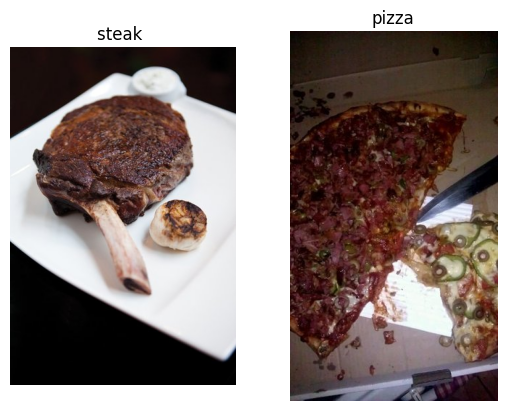

In [19]:
# Visualize data.
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak ')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

# 2. Preprocess the data (prepare it for a model)

In [20]:
# Define directory dataset paths.

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turning our data into **batches** (A small subset of the dataset our model looks at during training). It does it for a few reasons.

1. total images might not fit into the memory of our processor (GPU)
2. Trying to learn the patterns in total images in one hit could results in the model not being able to learn very well.


We will use a batch size of 32(standard)

In [21]:
# Create train and test data generators and rescale the data.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)   # Scaling our images to be between 0 and 1. We use the "." so it turns from int to float

In [22]:
# Load in our image data from directories and turn them into batches.

train_data = train_datagen.flow_from_directory(directory = train_dir,   # Target size of images (height, width)
                                              target_size=(224,224),
                                              class_mode='binary',  # Type of data we are working with.
                                              batch_size=32         # Size of minibatches to load data to
                                              )

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of a train data batch.
images, labels = next(train_data)   # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are they ?.

len(train_data)

47

In [25]:
# Get the first two images.
images[:2], images[0].shape

(array([[[[0.16078432, 0.06666667, 0.02745098],
          [0.16470589, 0.07058824, 0.03137255],
          [0.16470589, 0.07058824, 0.03137255],
          ...,
          [0.28235295, 0.11764707, 0.01960784],
          [0.29803923, 0.1254902 , 0.01176471],
          [0.29803923, 0.1254902 , 0.01176471]],
 
         [[0.16470589, 0.07843138, 0.02745098],
          [0.16862746, 0.07450981, 0.02745098],
          [0.16470589, 0.07058824, 0.02352941],
          ...,
          [0.30980393, 0.13725491, 0.02352941],
          [0.31764707, 0.14901961, 0.02352941],
          [0.30588236, 0.13725491, 0.01176471]],
 
         [[0.16078432, 0.07450981, 0.02352941],
          [0.16078432, 0.07450981, 0.02352941],
          [0.16078432, 0.07450981, 0.02352941],
          ...,
          [0.28627452, 0.13333334, 0.01960784],
          [0.2901961 , 0.13725491, 0.02352941],
          [0.28627452, 0.13333334, 0.01960784]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [26]:
  images[7]

array([[[0.9176471 , 0.8705883 , 0.8705883 ],
        [0.9294118 , 0.89019614, 0.8941177 ],
        [0.882353  , 0.8431373 , 0.8470589 ],
        ...,
        [0.7176471 , 0.5529412 , 0.39607847],
        [0.7019608 , 0.54901963, 0.38823533],
        [0.65882355, 0.5254902 , 0.34901962]],

       [[0.94117653, 0.90196085, 0.9058824 ],
        [0.93725497, 0.90196085, 0.9058824 ],
        [0.8745099 , 0.83921576, 0.85098046],
        ...,
        [0.6901961 , 0.5254902 , 0.36862746],
        [0.7137255 , 0.56078434, 0.40000004],
        [0.69411767, 0.54901963, 0.38431376]],

       [[0.94117653, 0.9058824 , 0.9176471 ],
        [0.92549026, 0.89019614, 0.90196085],
        [0.89019614, 0.86666673, 0.8745099 ],
        ...,
        [0.6627451 , 0.50980395, 0.34901962],
        [0.654902  , 0.5019608 , 0.34117648],
        [0.6392157 , 0.49411768, 0.32941177]],

       ...,

       [[0.08627451, 0.06666667, 0.08235294],
        [0.09803922, 0.07843138, 0.09411766],
        [0.09803922, 0

In [27]:
labels

array([1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

### 3. Create a CNN model(Let start with a baseline)

A baseline is simple a  moel or existing result that you setup when beginning a ML experiment and then as we keep experimenting, we try to beat the baseline.


In deep learning they is almost an infinite amount of architecures we could create. The best way to start is begin with something simple and see if it works then introduce complexitiy  as you move on....

In [28]:
# Make the creating of our model a little easier.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [55]:
# Create our model(this is will be our baseline, a layer convulutional neural network.)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)  # Input layer specifying the input shape
           ),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')  # Output layer (working with binary classification i.e only 1 output neuron)
])

# Compile the model.
model_4.compile(
    loss='binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
  )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

#4. Fit the model

In [57]:
# Check the lengths of training and test data generators.

len(train_data), len(test_data)

(47, 16)

In [58]:
history_4 = model_4.fit(train_data,
                        epochs =5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.6110 - loss: 2.1181 - val_accuracy: 0.8220 - val_loss: 0.4189
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.8228 - loss: 0.4126 - val_accuracy: 0.8540 - val_loss: 0.3312
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8902 - loss: 0.2760 - val_accuracy: 0.8480 - val_loss: 0.3400


In [59]:
model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

5. Evaluating our model.

it looks like our model is learning......

In [60]:
import pandas as pd
history_4.history

{'accuracy': [0.6759999990463257,
  0.0,
  0.831333339214325,
  0.0,
  0.8966666460037231],
 'loss': [1.0789012908935547,
  0.0,
  0.3790530860424042,
  0.0,
  0.27044567465782166],
 'val_accuracy': [0.8220000267028809, 0.8539999723434448, 0.8479999899864197],
 'val_loss': [0.4189474284648895, 0.3312062621116638, 0.33998796343803406]}

In [61]:
history_4.history

{'accuracy': [0.6759999990463257,
  0.0,
  0.831333339214325,
  0.0,
  0.8966666460037231],
 'loss': [1.0789012908935547,
  0.0,
  0.3790530860424042,
  0.0,
  0.27044567465782166],
 'val_accuracy': [0.8220000267028809, 0.8539999723434448, 0.8479999899864197],
 'val_loss': [0.4189474284648895, 0.3312062621116638, 0.33998796343803406]}

  ### 6. Adjusting the model Parameters.

  Fitting a machine learning model comes in 3 steps:

  0. Create a baseline
  1. Beat the baseline by overfitting a large model
  2. Reduce overfitting.


  Ways to induce overfitting:
  * Increase the number of conv layers.
  * Increase the number of conv filters.
  * Add another dense layer to the output of our flattened layer.


  Reduce overfitting:
  * Add data augmentation
  * Add regularization layers (such as MaxPool2D)
  * Add more data...  

In [63]:
# Create the model (This is going to be our new baseline)

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# Compile the  model.

model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Fit the model.
history_5 = model_5.fit(

)